In [4]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder


from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from keras.models import Sequential
from keras.regularizers import l2


In [5]:
TRAIN_DIR = './images/train'
TEST_DIR = './images/validation'

def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

train_features = extract_features(train['image'])

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

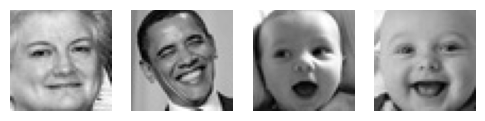

In [11]:

import matplotlib.pyplot as plt

# Lọc các hình ảnh có nhãn "happy"
happy_images = train[train['label'] == 'happy']['image'].values[:4]  # Lấy 4 hình ảnh đầu tiên

# Hiển thị các hình ảnh
plt.figure(figsize=(6, 2))
for i, img_path in enumerate(happy_images):
    img = load_img(img_path, color_mode='grayscale')
    plt.subplot(1, 4, i + 1)  # Tạo lưới 2x2
    plt.imshow(img, cmap='gray')
    plt.axis('off')  # Tắt trục
plt.show()